# Day 3 Data Cleaning and Exploration

Welcome back to Day 3 of our 100 Days of Data Science Challenge!\\
Today we’ll dive into one of the most crucial steps in any Data Science project — Data Cleaning and Exploration.

Remember this — “A model is only as good as the data you feed it.”
So before you even think about machine learning or AI, you need to understand and clean your data properly.

Today we’ll use a Retail Superstore dataset (from Kaggle) and explore how to handle missing values, duplicates, outliers, and perform quick summaries with `.info()` and `.describe()`.

## Topics Covered:
- Importing Dataset with `KaggleHub`
- Data Cleaning
- Exploratory Data Analysis (EDA)

## Importing Dataset with KaggleHub

Imagine instead of manually downloading datasets every time, you could just “plug and play” your Kaggle data directly into your notebook.
That’s where kagglehub comes in — it’s like your direct USB connection to Kaggle datasets!

In [21]:
! pip install kagglehub

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jr2ngb/superstore-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\amey9\.cache\kagglehub\datasets\jr2ngb\superstore-data\versions\1


In [23]:
! pip install pandas

In [24]:
import pandas as pd
from pathlib import Path

data_dir = Path(path)
df = pd.read_csv(data_dir / "superstore_dataset2011-2015.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [25]:
# Basic info and summary
print("Data Overview:")
df.info()

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    

In [26]:
print("\n Statistical Summary:")
print(df.describe())


 Statistical Summary:
            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.81

In [27]:
df['Postal Code'].value_counts()

Postal Code
10035.0    263
10024.0    230
10009.0    229
94122.0    203
10011.0    193
          ... 
60025.0      1
76248.0      1
80122.0      1
32935.0      1
11757.0      1
Name: count, Length: 631, dtype: int64

In [28]:
# rows where Postal Code is null
mask = df['Postal Code'].isna()

# 1) Count by State + City (combo)
state_city_counts = (
    df.loc[mask]
      .groupby(['State', 'City'])
      .size()
      .reset_index(name='count')
      .sort_values([ 'count'], ascending=[False])
)

print(state_city_counts)

                  State           City  count
2621      Santo Domingo  Santo Domingo    443
1958   National Capital         Manila    432
896   Francisco Morazán    Tegucigalpa    362
1382            Jakarta        Jakarta    337
1766            Managua        Managua    336
...                 ...            ...    ...
159           Aquitaine            Dax      1
163           Aquitaine       Libourne      1
108               Anhui        Jieshou      1
110               Anhui       Tongling      1
3178       Zaporizhzhya     Melitopol'      1

[3208 rows x 3 columns]


## Data Cleaning

Data cleaning involves preparing and correcting data by removing or fixing incorrect, corrupted, or incomplete records from a dataset.

- Steps in Data Cleaning
    - Handling Missing Values
    - Removing Duplicates
    - Correcting Data Types
    - Handling Outliers

### Handling Missing Values

In [29]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


When you see blanks or “NaN” in your dataset, don’t panic!

- If the missing values are few — you can drop those rows/columns.

- If they’re many — you can fill them using techniques like mean, median, or mode.

- When Missing Values Are Like “Postal Code” (Categorical Location Info)
    
    - Strategy 1: Fill Based on Related Columns
    - Strategy 2: Create a Special Category for Missing Values
    - Strategy 3: Drop It (If Redundant)



In [32]:
# Replace missing postal codes with median postal code of that city
df['Postal Code'] = df.groupby('City')['Postal Code'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)



In [33]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       40340
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [34]:
df['Postal Code'] = df.groupby('State')['Postal Code'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


In [35]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       36201
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [37]:
# Count missing values
missing_count = df['Postal Code'].isna().sum()

# Total rows in the dataset
total_rows = len(df)
print(total_rows)

# Calculate percentage of missing values
missing_percentage = (missing_count / total_rows) * 100

print(f"📬 Missing Postal Codes: {missing_count}")
print(f"📊 Percentage Missing: {missing_percentage:.2f}%")


51290
📬 Missing Postal Codes: 36201
📊 Percentage Missing: 70.58%


In [38]:
df.drop(columns=['Postal Code'], inplace=True)


### Removing Duplicates

#### Strategy to Handle Duplicates

| Situation                                   | Strategy                | Code                                                    | Explanation                                      |
| ------------------------------------------- | ----------------------- | ------------------------------------------------------- | ------------------------------------------------ |
| Exact duplicates (all columns same)         | Drop them               | `df.drop_duplicates(inplace=True)`                      | Safe if identical records add no new info        |
| Partial duplicates (same key, diff details) | Keep first or aggregate | `df.drop_duplicates(subset=['Order ID'], keep='first')` | Keep one record per unique key (e.g., per order) |
| Need to see which rows are duplicated       | Flag them               | `df['is_duplicate'] = df.duplicated()`                  | Helps analyze before dropping                    |
| Duplicates valid (e.g., repeat customers)   | Keep                    | —                                                       | Don’t delete without reason                      |


In [39]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n⚠️ Duplicates found: {duplicates}")
df.drop_duplicates(inplace=True)


⚠️ Duplicates found: 0


### Correcting Data Types

In [44]:
# Outlier detection using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print(f"\n🚨 Outliers detected: {len(outliers)}")


🚨 Outliers detected: 5653


<Axes: >

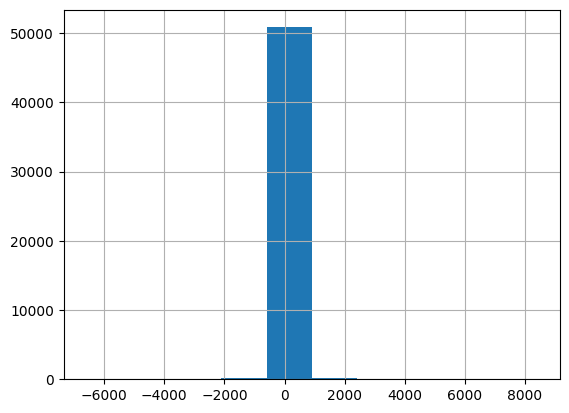

In [55]:
df['Profit'].hist()

In [ ]:
# Filter data example - Select high profit rows
high_profit = df[df['Profit'] > 500]
print("\n💰 High Profit Records:")
print(high_profit.head())